# Deep Learning
## Image classification with Fashion MNIST

* Name: Rahul Kumar
* E-mail: krahul@deakin.edu.au

## (A) Constructing a deep forward neural network

### 1.1 Understanding the data

###  Importing important packages and libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
fdata = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fdata.load_data()

We have imported the libraries that we’ll use to implement on our Deep Learning model in the Fashion MNIST dataset & loaded the dataset using Keras instead of Scikit-Learn as now every image is represented as a 28X28 array rather than a 1D array of size 784. Furthermore, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0). We have further splitted the dataset into Training & Test set.

In [3]:
keras.backend.clear_session()

### Exploratory Data Analysis (EDA)

In [4]:
# Output classes of the fashion-mnist dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Each image is mapped to a single label. As class names are not included, we need list of classes to create them to plot the images 

In [5]:
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Training data type: ', train_images.dtype)
print('Testing data shape : ', test_images.shape, test_labels.shape)
print('Testing data type: ', test_images.dtype)

Training data shape :  (60000, 28, 28) (60000,)
Training data type:  uint8
Testing data shape :  (10000, 28, 28) (10000,)
Testing data type:  uint8


In [6]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


- From the above output, we can infer that the training data has a shape of 60000 x 28 x 28 as there are 60,000 training images with each image of 28 x 28 pixels with integer data type. Similarly, the test data has a shape of 10000 x 28 x 28 as there are 10,000 testing images with integer data type. 

- The labels or output classes are an array of integers 0 to 9, representing 10 classes of clothing.

### Preprocess the data


Ankle boot


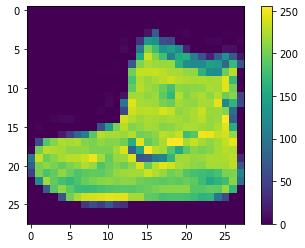

In [7]:
plt.figure()
plt.imshow(train_images[0])
print(class_names[train_labels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

**The data must be preprocessed before training the network as we can see from the first image in the training set, the pixel values fall in the range of 0 to 255. Also, these images have a dimension of 28 x 28. As a result, we need to preprocess the data before we feed it into the model.**

Our dataset is already split into training & test set without a validation set, so we'll create one. Additionally, since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we'll scale the pixel intensities down to the 0-1 range by dividing them by 255.0 (this also converts them to floats):

In [8]:
# Normalization
X_valid_images, X_train_images = train_images[:5000] / 255.0, train_images[5000:] / 255.0
y_valid_images, y_train_images = train_labels[:5000], train_labels[5000:]

Now, we have constructed a validation set from the first 50000 images & training set from the last 5000 images with respective validation & training labels. 
**Normalized data remove the biased weights and also reduce the complexity of the problem our network is trying to solve**

The first image in the training set represents a coat:

In [9]:
class_names[y_train_images[0]]

'Coat'

To verify that our data is in the correct format and we're ready to build and train the network, we will now display the first 100 images from the training set and display the class name below each image:

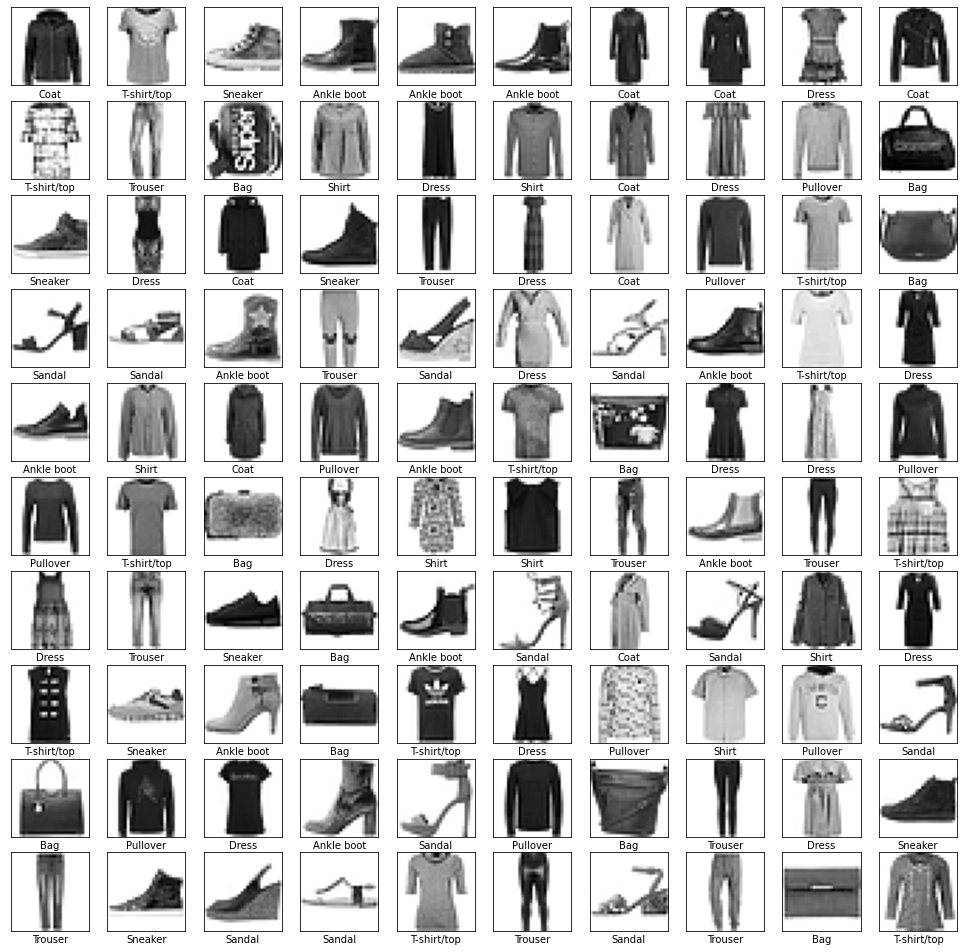

In [10]:
plt.figure(figsize=(17,17))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_images[i]])
plt.show()

### 1.2 Setting up a model for training

### Building the model using sequential API

Now we will build our Neural Network, here we will demonstrate MLP with 2 hidden layers:

In [11]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

- The first line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are simply composed of a single stack of layers connected sequentially, known as Sequential API.

- Next, we build the 1st layer and add it to the model. It is a 'Flatten' layer whose purpose is to convert each input image into a 1-D array as we flatten the data, so that a (28x28) shape flattens to 784 : if it receives input data X, it computes 'X.reshape(-1,1)'. This layer doesn't have any parameters, it's just there for some simple preprocessing. Since it is the 1st layer in the model, we should specify the input_shape, which doesn't include the batch size, only the shape of the instances.

- Next, we added a Dense hidden layer with a ReLu activation function consisting of 300 nodes (or neurons).

- Then we added a 2nd Dense hidden layer using a ReLu activation function with 100 nodes (or neurons).

- Finally, we added a Dense output layer with 10 nodes or neurons (one per class), using the softmax activation function (because the classes are exclusive).


The model's 'summary()' method will display all the model's layers (model structure), including each layer's name, it's output shape ('None' means the batch size can be anything), and it's number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters: 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


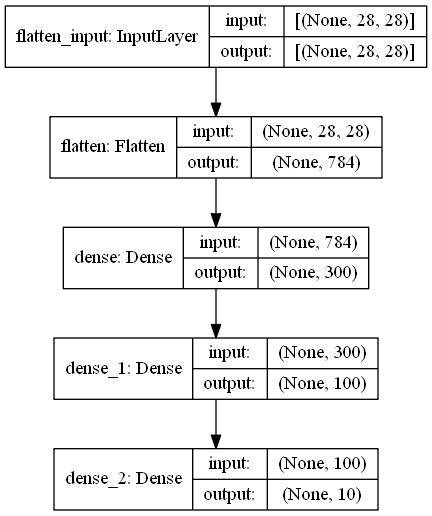

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

The first hidden layer has 784X300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters which provides a lot of flexibility to the model to fit the training data, but it also means that the model runs the risk of 'overfitting'.

### Compiling the model

After a model is created, we will call its compile() method to specify the loss function & the optimizer to use.

In [14]:
rmsopt = RMSprop()
model.compile(optimizer=rmsopt, 
              loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

- RMSprop is a gradient-based optimization technique used in training neural networks. Rmsprop was developed as a stochastic technique for mini-batch learning. RMSprop uses an adaptive learning rate instead of treating the learning rate as a hyperparameter. This means that the learning rate changes over time.

- Then we used the 'sparse_categorical_crossentropy' loss because we are dealing with sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in our case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors), then we would need to use 'categorical_crossentropy' loss instead. If we were dealing with binary classification (with one or more binary labels), then we would be using 'sigmoid' (i.e., logistic) activation function in the output layer instead of the 'softmax' activation function, and we would use the 'binary_crossentropy' loss function.

- Finally, as this is a classifier, it's useful to measure its 'accuracy' during training & evaluation.

### 1.3 Fitting the model

### Training & evaluating the model

After compiling is done, now the model is ready to be trained. For this we simply call its 'fit()' method:

In [15]:
# saving the initial weights for later experiments
init_weights = model.get_weights()

# Fitting the model to the training set
history = model.fit(X_train_images, y_train_images, epochs=30,
                   validation_data = (X_valid_images, y_valid_images), batch_size=128)

Epoch 1/30
430/430 [==============================] - 3s 5ms/step - loss: 0.5544 - accuracy: 0.8007 - val_loss: 0.4400 - val_accuracy: 0.8382
Epoch 2/30
430/430 [==============================] - 2s 5ms/step - loss: 0.3842 - accuracy: 0.8601 - val_loss: 0.4118 - val_accuracy: 0.8474
Epoch 3/30
430/430 [==============================] - 3s 6ms/step - loss: 0.3386 - accuracy: 0.8741 - val_loss: 0.3193 - val_accuracy: 0.8854
Epoch 4/30
430/430 [==============================] - 4s 10ms/step - loss: 0.3131 - accuracy: 0.8842 - val_loss: 0.3597 - val_accuracy: 0.8766
Epoch 5/30
430/430 [==============================] - 4s 8ms/step - loss: 0.2947 - accuracy: 0.8911 - val_loss: 0.3834 - val_accuracy: 0.8696
Epoch 6/30
430/430 [==============================] - 4s 9ms/step - loss: 0.2773 - accuracy: 0.8962 - val_loss: 0.3419 - val_accuracy: 0.8800
Epoch 7/30
430/430 [==============================] - 2s 5ms/step - loss: 0.2649 - accuracy: 0.9013 - val_loss: 0.3164 - val_accuracy: 0.8892
Epoch

- We train the model by fitting it to the training data, so we give it the input (images) and expected output (labels). Here also pass a validation set we defined earlier in order to minimize overfitting.

- We also need to define how many times the network will be trained, this is an 'epoch'. It’s an arbitrary cutoff and here we chose 30 epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). We also used 'batch size' which defines the number of samples that will be propagated through the network & here we used batch size of 128 samples. Batch size controls the accuracy of the estimate of the error gradient when training neural networks.

- Training showed us the results (the mean training time per sample, and the loss & accuracy) per epoch, taking into account with each epoch, the loss decreases and the accuracy increases, meaning our model is improving. The validation accuracy reached 89.50% after 30 epochs which is not too far from the training accuracy, so there seems to be bit overfitting going on.

- The 'fit()' method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set. 

We can use this dictionary to create a pandas DataFrame and call its 'plot()' method, we will get the learning curves:

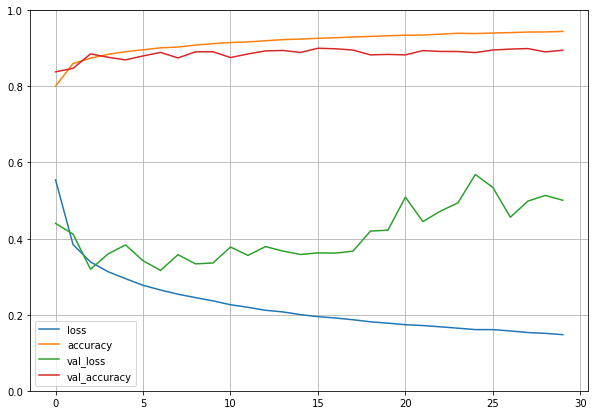

In [16]:
pd.DataFrame(history.history).plot(figsize = (10,7))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

**The loss function and training metrics can be recorded and visualised as below:**

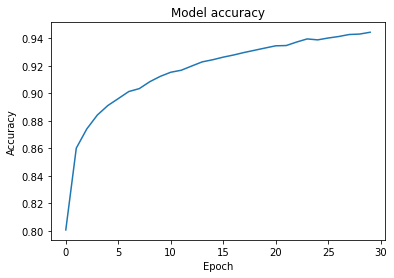

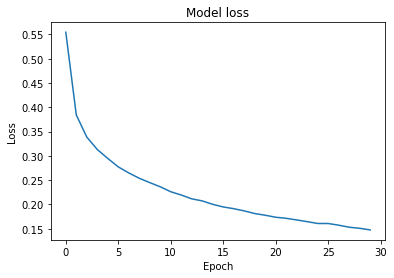

In [17]:
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
 
# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

- From the above graphs, we can conclude that the training accuracy & the validation accuracy steadily increase during training, while the training loss and the validation loss decreases. Furthermore, the validation curves are close to the training curves, which means there isn't too much overfitting. 

- The training set performance ends up beating the validation performance, as is generally the case when we train for long enough. We can tell that our model has not quite converged yet, as the validation loss is still going down, so we can probably continue training. 

- The trend either stabilizes or gets worse after certain epochs, this phenomenon is known as 'overfitting' (when the model adapts too well to a specific dataset and thus does not generalize well on new information). Some of the ways to mitigate this is weight Regularization or Early Stopping.

### Check model performance via test set

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 125.4957 - accuracy: 0.8861
test_loss: 125.49571228027344
test_acc: 0.8860999941825867


**We can see that the test loss is 125.495 and accuracy is 88.60% for this neural network, which is pretty close to the training metrics at the 30th epoch.**

### Make predictions

In [19]:
probability_model = Sequential([model, tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)


In [21]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

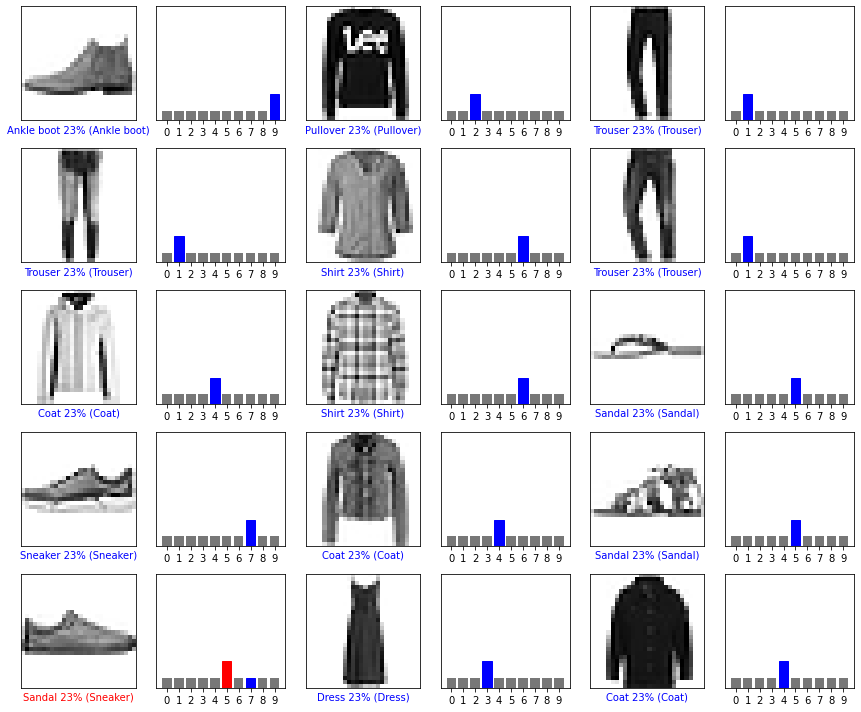

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## (B). Analyse the model

### 2.1 Model size

**The model's 'summary()' method will display all the model's layers (model structure), including each layer's name, it's output shape ('None' means the batch size can be anything), and it's number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters:**

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


From the model structure, we can see that there a total of 266,610 Trainable parameters in the model

The first hidden layer has 784X300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters, while the second hidden layer has 300X100 connection weights, pluss 100 bias terms which equals to 30,100 parameters and output layer has 100X10 connection weights, plus 10 bias terms which equals to 1010 parameters and overall the total parameters adds upto 266,610.  

### 2.2 Visualise the parameter values

We can easily get a model's list of layers, to fetch a layer by its index, or we can fetch it by name:

In [24]:
model.layers

In [25]:
hidden1 = model.layers[1]

In [26]:
hidden1.name

'dense'

In [27]:
model.get_layer('dense') is hidden1

True

All the parameters of a layer can be accessed using its 'get_weights()' and 'set_weights()' methods. For a Dense layer, this incorporates both the connection weights and the bias terms:

In [28]:
weights, biases = hidden1.get_weights()

In [29]:
weights

array([[-0.09898014,  0.0540211 , -0.06658375, ...,  0.04622151,
         0.11610445, -0.05883858],
       [-0.1458311 , -0.09630423,  0.06651394, ...,  0.01122186,
         0.11564662,  0.05802857],
       [ 0.0149537 ,  0.09683365, -0.21129459, ..., -0.03473279,
         0.46726847, -0.02919375],
       ...,
       [ 0.03911466, -0.00453991, -0.04903851, ...,  0.06678003,
         0.30608898,  0.01107062],
       [-0.07366395,  0.0969065 , -0.25223416, ..., -0.0285822 ,
         0.20506737, -0.00155695],
       [-0.25634417, -0.11981378,  0.12071577, ..., -0.01403594,
         0.03423593,  0.01239895]], dtype=float32)

In [30]:
weights.shape

(784, 300)

In [31]:
biases

array([ 2.68601682e-02,  6.83294982e-02,  8.96121934e-02, -3.24941367e-01,
       -7.70526379e-02,  2.74389461e-02, -9.90775749e-02,  7.93927759e-02,
       -1.34194225e-01,  1.59381539e-01,  2.94945259e-02, -1.44186541e-01,
       -2.42011338e-01,  5.58660105e-02,  2.66041338e-01,  1.68496430e-01,
        7.88014308e-02, -8.20604488e-02, -1.40706412e-02,  3.79991531e-03,
        9.96574387e-02, -2.50209361e-01, -2.48148501e-01, -2.74588674e-01,
       -5.70601486e-02, -1.06999669e-02,  1.06978789e-01,  1.78769559e-01,
       -1.88188091e-01, -1.38963029e-01,  4.43986952e-02, -4.87047713e-03,
        1.63701713e-01,  1.14396647e-01,  1.73446894e-01, -2.13166714e-01,
        8.05616528e-02,  3.92887443e-02,  8.03514495e-02,  1.05013855e-01,
        2.04967242e-02,  1.98472843e-01, -2.15472326e-01,  7.64700323e-02,
        1.10229507e-01,  1.30183876e-01, -1.52052015e-01, -5.26607744e-02,
       -5.04748933e-02,  6.59597293e-02,  7.77833816e-03,  5.49912965e-03,
       -2.28433356e-01,  

In [32]:
biases.shape

(300,)

**The Dense layer initialized the connection weights randomly as it is required to break the symmetry, and the biases were initialized to zeroes. We can also use another initialization method, we can set 'Kernel_initializer' or 'bias_initializer' when creating the layer.**

# (C) Using TensorFlow tools

### 3.1 Check the training using TensorBoard

In [33]:
from datetime import datetime
import os

In [34]:
!rm -rf ./logs/
 
from datetime import datetime
import os
 
root_logdir = "logs"
run_id = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join(root_logdir, run_id)
 
callbacks = [
    tf.keras.callbacks.TensorBoard(
        log_dir=logdir,
        histogram_freq=1
    )
]
 
 
# reset the training
model.set_weights(init_weights)
 
history = model.fit(X_train_images, y_train_images, epochs=30,
                    validation_data = (X_valid_images, y_valid_images),
                    batch_size=128, callbacks=callbacks)


'rm' is not recognized as an internal or external command,
operable program or batch file.


Epoch 1/30
430/430 [==============================] - 4s 8ms/step - loss: 0.5599 - accuracy: 0.7982 - val_loss: 0.4144 - val_accuracy: 0.8500
Epoch 2/30
430/430 [==============================] - 2s 4ms/step - loss: 0.3880 - accuracy: 0.8573 - val_loss: 0.4514 - val_accuracy: 0.8344
Epoch 3/30
430/430 [==============================] - 2s 5ms/step - loss: 0.3400 - accuracy: 0.8743 - val_loss: 0.3466 - val_accuracy: 0.8706
Epoch 4/30
430/430 [==============================] - 2s 4ms/step - loss: 0.3134 - accuracy: 0.8838 - val_loss: 0.3464 - val_accuracy: 0.8794
Epoch 5/30
430/430 [==============================] - 4s 10ms/step - loss: 0.2936 - accuracy: 0.8910 - val_loss: 0.3191 - val_accuracy: 0.8866
Epoch 6/30
430/430 [==============================] - 3s 7ms/step - loss: 0.2783 - accuracy: 0.8952 - val_loss: 0.3163 - val_accuracy: 0.8910
Epoch 7/30
430/430 [==============================] - 3s 8ms/step - loss: 0.2655 - accuracy: 0.9015 - val_loss: 0.3109 - val_accuracy: 0.8936
Epoch

In [37]:
%reload_ext tensorboard
%tensorboard --logdir=logs


### 3.2 Apply regularisation

Improve the training process by applying regularisation. Below are some options:

1.   Dropout
2.   Batch normalisation

In [38]:
model2 = Sequential()
model2.add(Flatten(input_shape=[28,28]))
model2.add(Dense(300, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(10, activation='softmax'))

In [39]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
________________________________________________

### Compiling the model

In [40]:
# Model Compile
sgdopt = SGD(lr=0.01)
model2.compile(optimizer=sgdopt, 
              loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

- Regarding the optimizer, 'sgd' means that we will train the model using simple Stochastic Gradient Descent. Thus, Keras will perform the backpropagation algorithm (i.e., reverse-mode autodiff plus Gradient Descent). Here we have used SGD with learning rate of 0.01 of our model.  

### Training & evaluating the model

In [41]:
init_weights2 = model2.get_weights()

In [42]:
history2 = model2.fit(X_train_images, y_train_images, epochs=30,
                   validation_data = (X_valid_images, y_valid_images), batch_size=30)

Epoch 1/30
1834/1834 [==============================] - 4s 2ms/step - loss: 0.7908 - accuracy: 0.7309 - val_loss: 0.5203 - val_accuracy: 0.8234
Epoch 2/30
1834/1834 [==============================] - 4s 2ms/step - loss: 0.5368 - accuracy: 0.8140 - val_loss: 0.4569 - val_accuracy: 0.8382
Epoch 3/30
1834/1834 [==============================] - 4s 2ms/step - loss: 0.4768 - accuracy: 0.8329 - val_loss: 0.4132 - val_accuracy: 0.8598
Epoch 4/30
1834/1834 [==============================] - 4s 2ms/step - loss: 0.4442 - accuracy: 0.8423 - val_loss: 0.4000 - val_accuracy: 0.8622
Epoch 5/30
1834/1834 [==============================] - 4s 2ms/step - loss: 0.4210 - accuracy: 0.8492 - val_loss: 0.3735 - val_accuracy: 0.8696
Epoch 6/30
1834/1834 [==============================] - 4s 2ms/step - loss: 0.4012 - accuracy: 0.8573 - val_loss: 0.3657 - val_accuracy: 0.8746
Epoch 7/30
1834/1834 [==============================] - 3s 2ms/step - loss: 0.3872 - accuracy: 0.8620 - val_loss: 0.3590 - val_accuracy:

- Training showed us the results (the mean training time per sample, and the loss & accuracy) per epoch, taking into account with each epoch, the loss decreases and the accuracy increases, meaning our model is improving. The validation accuracy reached 88.80% after 30 epochs which is not too far from the training accuracy, so there does not seem to be much overfitting going on.

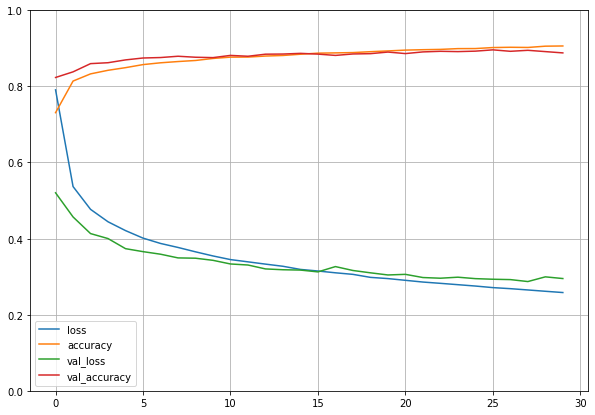

In [43]:
pd.DataFrame(history2.history).plot(figsize = (10,7))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

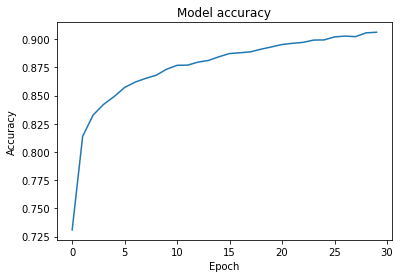

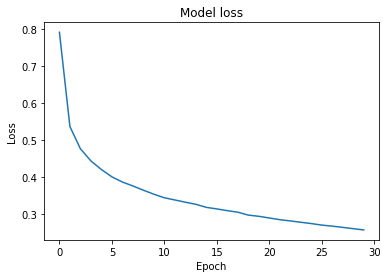

In [44]:
# Plot training accuracy values
plt.plot(history2.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
 
# Plot training loss values
plt.plot(history2.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

### Check model performance via test set

In [45]:
test_loss1, test_acc1 = model2.evaluate(test_images, test_labels)
print(f'test_loss: {test_loss1}')
print(f'test_acc: {test_acc1}')

313/313 [==============================] - 1s 1ms/step - loss: 41.5092 - accuracy: 0.8662
test_loss: 41.509212493896484
test_acc: 0.8661999702453613


**We can see that the test loss is 41.509 and accuracy is 86.61 for this neural network, which is pretty close to the training metrics at the 30th epoch,as compared to the previous Neural network,the tuned model is more accurate with respective to the test loss, it is more efficient.**